In [6]:
import numpy as np
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# 数据归一化

* z-score标准化
* 最大-最小规范化
* 小数定标规范化 y = x/10的j次方
* Logistic模式： 1/(1+e^(-x))
* 模糊量化模式

In [10]:
X = np.array([[ 1., -1.,  2.], 
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])

#标准z-score归一化
X_scaled = scale(X)
standard_X_scaled = StandardScaler().fit(X)
minmax_X_scaled = MinMaxScaler().fit(X)

print(X_scaled)
print(standard_X_scaled.transform(X))
print(minmax_X_scaled.transform(X))

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]
[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]
[[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]


# 重采样 resample

# 数据划分
数据划分可以手工不用函数也可以执行，一般按照时间来划分具体的训练数据和测试数据

In [12]:
def split_data(observed_data, split_ratio=(8, 2, 1)):
    """
    split the observed data into train-evaluation-test three part
    :param observed_data:
    :param split_ratio: relative proportion among train,evaluation,test
    :return: train, evaluation, test data
    """
    total = split_ratio[0] + split_ratio[1] + split_ratio[2]
    length = len(observed_data)
    train_cnt = int((split_ratio[0] / total) * length)
    test_cnt = int((split_ratio[2] / total) * length)
    return observed_data[:train_cnt], observed_data[train_cnt:-test_cnt], observed_data[-test_cnt:]

# 数据展示

In [34]:
def plot_data(y_val, x_val=None, legend="", x_label="", y_label="", title="", file_name=""):
    if x_val is None:
        x_val = range(len(y_val))
    plt.figure()
    plt.plot(x_val, y_val, label=legend)
    if legend:
        # show legend(line label)
        plt.legend()
    # show x label
    plt.xlabel(x_label)
    # show y label
    plt.ylabel(y_label)
    # show title
    plt.title(title)
    if file_name:
        plt.savefig('./result/%s.png' % file_name, bbox_inches='tight')
    plt.tight_layout()
    plt.show()


def box_plot(data, file_name=""):
    """
    box plot —— use to see the distribution of the datas
    :param data: list of data
    :param file_name: file name of the plot figure
    :return: None
    """
    plt.boxplot(np.array(data), sym="o")
    if file_name:
        plt.savefig('./result/%s.png' % file_name, bbox_inches='tight')
    plt.show()


def distribution_plot(data, file_name=""):
    """
    distribution plot —— use to see the distribution of the data
    :param data: list of data
    :param file_name: file name of the plot figure
    :return: None
    """
    plt.figure(figsize=(8, 5))
    sns.set_style('whitegrid')
    sns.distplot(np.array(data), rug=True, color='b')
    plt.title("distribution")
    if file_name:
        plt.savefig("./result/%s.png" % file_name, bbox_inches='tight')
    plt.show()


def scatter_plot(y_val, x_val=None, x_label="", y_label="", title="", file_name=""):
    """
    scatter plot —— use to see the distribution of the data
    :param y_val: y value
    :param x_val: x value, if None will use 0 ~ range(len(y_val))
    :param x_label:
    :param y_label:
    :param title:
    :param file_name: file name of the plot figure
    :return: None
    """
    if x_val is None:
        x_val = range(len(y_val))
    plt.scatter(x_val, y_val, marker='o', color='black', s=10)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    if file_name:
        plt.savefig('./result/%s.png' % file_name, bbox_inches='tight')
    plt.show()


def heatmap(data, file_name="", method="pearson"):
    """
    draw the heat map of sets of data
    :param data: DataFrame format
    :param file_name:
    :param method: method used to calculate the correlation
                   pearson - range -1 ~ 1(only two variable in perfect linear relation, it will be ±1)
                   spearman - range -1 ~ 1(it will be ±1 when
                   the relation between two variable can be described by a monotonic function)
    reference
    < 0.1 : no relation
    0.10 ~ 0.29: weak relation
    0.30 ~ 0.49: medium relation
    > 0.5: strong relation
    :return: None
    """
    sns.heatmap(
        data.corr(method=method),
        xticklabels=data.corr(method=method).columns,
        yticklabels=data.corr(method=method).columns,
        annot=True, annot_kws={'weight': 'bold'},
        vmin=-0.5, vmax=1, cmap="YlGnBu"
    )
    plt.tight_layout()
    if file_name:
        file_name = file_name.split(".")[0]
        plt.savefig("./result/heatmap/%s.png" % file_name)
    plt.show()
    plt.close()


def bar_plot(y_val, x_val=None, x_label=None, horizontal=False, file_name=""):
    if x_val is None:
        x_val = range(len(y_val))
    if x_label is None:
        x_label = x_val
    if horizontal:
        plt.barh(y=x_val, width=y_val, tick_label=x_label)
        for a, b in zip(y_val, x_val):
            plt.text(a + 0.01, b, '%.0f' % a, ha='left', va='center', fontsize=11)
    else:
        plt.bar(x=x_val, height=y_val, tick_label=x_label)
        for a, b in zip(x_val, y_val):
            plt.text(a, b + 0.01, '%.0f' % b, ha='center', va='bottom', fontsize=11)
    plt.tight_layout()
    # plt.savefig('./result/%s.png' % file_name, bbox_inches='tight')
    # if file_name:
    #     plt.savefig('./result/%s.png' % file_name, bbox_inches='tight')
    plt.show()


def pie_plot(data, labels=None):
    """
    draw data in pie figure
    :param data:list(pure data) or dict(use keys as labels and values as data)
    :param labels: None if data is a dict
    :return:
    """
    X = []
    if isinstance(data, dict):
        labels = []
        for k in data.keys():
            labels.append(k)
            X.append(data[k])

    if labels is None:
        raise ValueError("labels should be specify")

    plt.pie(X, labels=labels, autopct='%1.2f%%')  # 画饼图（数据，数据对应的标签，百分数保留两位小数点）
    plt.title("Pie chart")

    plt.show()

In [24]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

data = sm.datasets.co2.load_pandas()
y = data.data
y = y['co2'].resample('MS').mean()
y = y.fillna(y.bfill())


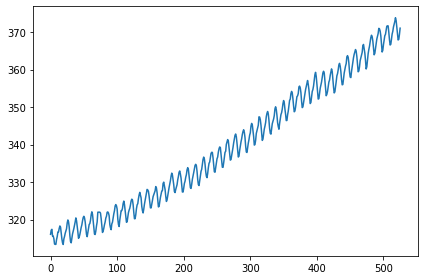

In [25]:
plot_data(y)

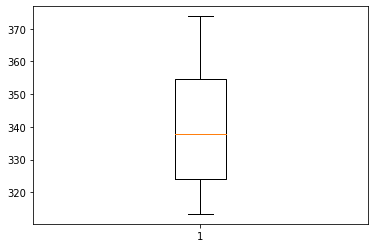

In [21]:
box_plot(y)

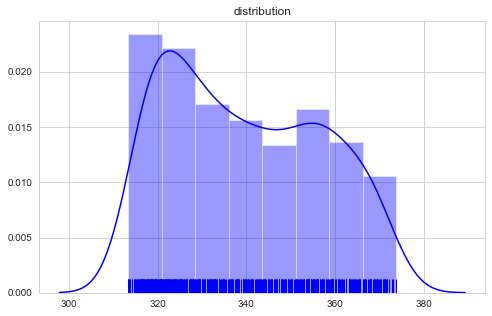

In [27]:
distribution_plot(y)

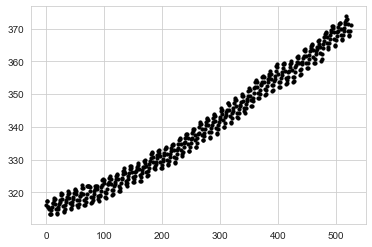

In [29]:
scatter_plot(y)

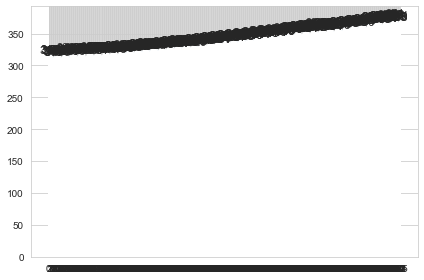

In [35]:
bar_plot(y)

In [36]:
pie_plot(y)

ValueError: labels should be specify

# 差异计算

In [ ]:
def rmse(predictions, targets):
    """
    root-mean-square error
    :param predictions:
    :param targets:
    :return:
    """
    predictions = np.array(predictions)
    targets = np.array(targets)
    return np.sqrt(((predictions - targets) ** 2).mean())


def mse(predictions, targets):
    """
    mean-square error
    :param predictions:
    :param targets:
    :return:
    """
    predictions = np.array(predictions)
    targets = np.array(targets)
    return ((predictions - targets) ** 2).mean()